In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df= pd.read_csv(r"C:\Users\16479\Downloads\20100067.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   REF_DATE                                               4918 non-null   object 
 1   GEO                                                    4918 non-null   object 
 2   DGUID                                                  4918 non-null   object 
 3   North American Industry Classification System (NAICS)  4918 non-null   object 
 4   Sales, price and volume                                4918 non-null   object 
 5   UOM                                                    4918 non-null   object 
 6   UOM_ID                                                 4918 non-null   int64  
 7   SCALAR_FACTOR                                          4918 non-null   object 
 8   SCALAR_ID                                       

In [23]:
df.head(5)

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),"Sales, price and volume",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2016A000011124,Retail trade [44-45],Retail sales in current prices,Dollars,81,millions,6,v1446870151,1.1.1,50417.0,NaN,NaN,NaN,0
1,2017-01,Canada,2016A000011124,Retail trade [44-45],Retail sales Chained Fisher volume index (scal...,Dollars,81,millions,6,v1446870181,1.1.2,50138.0,NaN,NaN,NaN,0
2,2017-01,Canada,2016A000011124,Retail trade [44-45],Fisher Chained Price Index (scaled to equal 10...,Index,160,millions,6,v1446870182,1.1.3,100.6,NaN,NaN,NaN,1
3,2017-01,Canada,2016A000011124,Retail trade [44-45],Retail sales at 2017 constant prices (Unchaine...,Dollars,81,millions,6,v1446870183,1.1.4,50138.0,NaN,NaN,NaN,0
4,2017-01,Canada,2016A000011124,Motor vehicle and parts dealers [441],Retail sales in current prices,Dollars,81,millions,6,v1446870152,1.2.1,13562.0,NaN,NaN,NaN,0


In [24]:
df = df[df['COORDINATE'].str.endswith('.1')]

In [25]:
df.describe()

,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,2379.0,2379.0,2379.000000,0.0,0.0,2379.0
mean,81.0,6.0,5837.063472,NaN,NaN,0.0
std,0.0,0.0,10474.094295,NaN,NaN,0.0
min,81.0,6.0,42.000000,NaN,NaN,0.0
25%,81.0,6.0,1035.500000,NaN,NaN,0.0
50%,81.0,6.0,2290.000000,NaN,NaN,0.0
75%,81.0,6.0,6987.000000,NaN,NaN,0.0
max,81.0,6.0,66378.000000,NaN,NaN,0.0


In [26]:
df.rename(columns={'North American Industry Classification System (NAICS)': 'NAICS'}, inplace=True)

In [27]:
def category_level(NAICS):
    if pd.notnull(NAICS):
        # Check if the NAICS is 'Retail trade [44-45]'
        if NAICS.strip() == 'Retail trade [44-45]':
            return 'A'
        else:
            # Extract the digits between square brackets
            digits = NAICS.split('[')[-1].split(']')[0]
            # Count the number of digits to determine the category level
            return len(digits) - 2  # Subtract 2 to get the category level
    else:
        return None

# Apply the function to create a new column 'Category_Level'
df['Category_Level'] = df['NAICS'].apply(category_level)

In [28]:
df.head(10)

,REF_DATE,GEO,DGUID,NAICS,"Sales, price and volume",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,Category_Level
0,2017-01,Canada,2016A000011124,Retail trade [44-45],Retail sales in current prices,Dollars,81,millions,6,v1446870151,1.1.1,50417.0,NaN,NaN,NaN,0,A
4,2017-01,Canada,2016A000011124,Motor vehicle and parts dealers [441],Retail sales in current prices,Dollars,81,millions,6,v1446870152,1.2.1,13562.0,NaN,NaN,NaN,0,1
6,2017-01,Canada,2016A000011124,Automobile dealers [4411],Retail sales in current prices,Dollars,81,millions,6,v1446870153,1.3.1,11980.0,NaN,NaN,NaN,0,2
8,2017-01,Canada,2016A000011124,New car dealers [44111],Retail sales in current prices,Dollars,81,millions,6,v1446870154,1.4.1,11021.0,NaN,NaN,NaN,0,3
10,2017-01,Canada,2016A000011124,Used car dealers [44112],Retail sales in current prices,Dollars,81,millions,6,v1446870155,1.5.1,960.0,NaN,NaN,NaN,0,3
12,2017-01,Canada,2016A000011124,Other motor vehicle dealers [4412],Retail sales in current prices,Dollars,81,millions,6,v1446870156,1.6.1,856.0,NaN,NaN,NaN,0,2
14,2017-01,Canada,2016A000011124,"Automotive parts, accessories and tire retaile...",Retail sales in current prices,Dollars,81,millions,6,v1446870157,1.7.1,725.0,NaN,NaN,NaN,0,2
16,2017-01,Canada,2016A000011124,Building material and garden equipment and sup...,Retail sales in current prices,Dollars,81,millions,6,v1446870158,1.8.1,2932.0,NaN,NaN,NaN,0,1
18,2017-01,Canada,2016A000011124,Food and beverage retailers [445],Retail sales in current prices,Dollars,81,millions,6,v1446870159,1.9.1,10071.0,NaN,NaN,NaN,0,1
20,2017-01,Canada,2016A000011124,Grocery and convenience retailers [4451],Retail sales in current prices,Dollars,81,millions,6,v1446870160,1.10.1,7612.0,NaN,NaN,NaN,0,2


In [29]:
category_level_1_df = df[df['Category_Level'] == 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


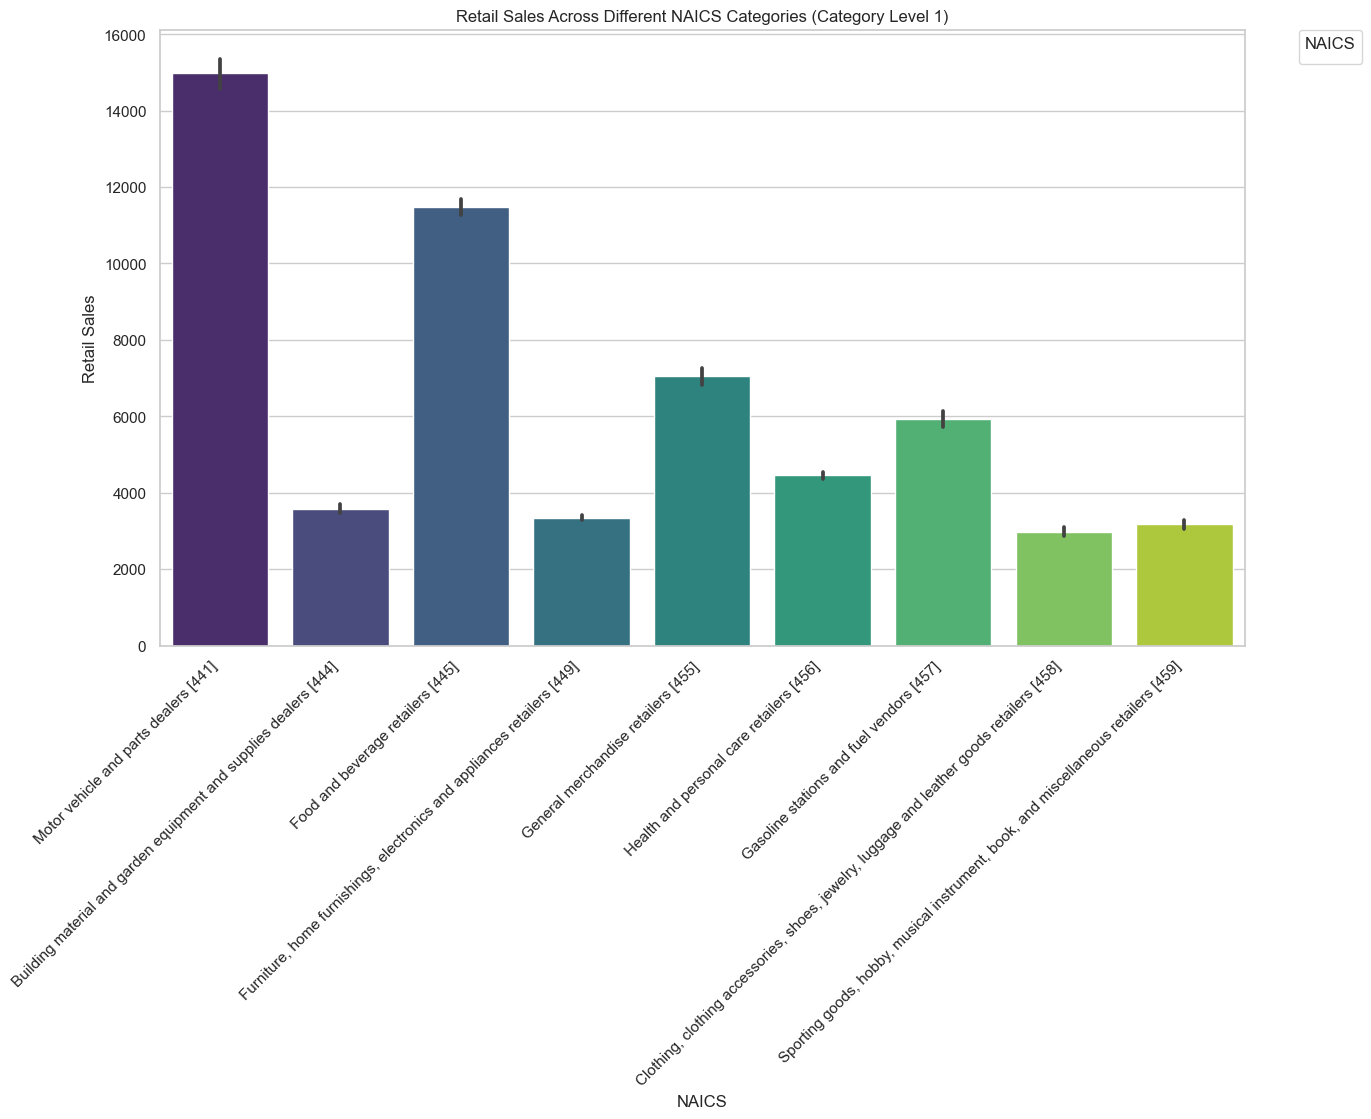

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named category_level_1_df

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a bar chart for retail sales across different NAICS categories
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=category_level_1_df, x='NAICS', y='VALUE', palette='viridis')
plt.title('Retail Sales Across Different NAICS Categories (Category Level 1)')
plt.xlabel('NAICS')
plt.ylabel('Retail Sales')

# Show legend
ax.legend(title='NAICS', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


In [44]:
# Assuming your DataFrame is named category_level_1_df

# Create a new DataFrame for 'Automobiles'
automobiles_df = df[df['NAICS'].str.contains(r'\[441\d')]

automobiles_df.head(5)

,REF_DATE,GEO,DGUID,NAICS,"Sales, price and volume",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,Category_Level
6,2017-01,Canada,2016A000011124,Automobile dealers [4411],Retail sales in current prices,Dollars,81,millions,6,v1446870153,1.3.1,11980.0,NaN,NaN,NaN,0,2
8,2017-01,Canada,2016A000011124,New car dealers [44111],Retail sales in current prices,Dollars,81,millions,6,v1446870154,1.4.1,11021.0,NaN,NaN,NaN,0,3
10,2017-01,Canada,2016A000011124,Used car dealers [44112],Retail sales in current prices,Dollars,81,millions,6,v1446870155,1.5.1,960.0,NaN,NaN,NaN,0,3
12,2017-01,Canada,2016A000011124,Other motor vehicle dealers [4412],Retail sales in current prices,Dollars,81,millions,6,v1446870156,1.6.1,856.0,NaN,NaN,NaN,0,2
14,2017-01,Canada,2016A000011124,"Automotive parts, accessories and tire retaile...",Retail sales in current prices,Dollars,81,millions,6,v1446870157,1.7.1,725.0,NaN,NaN,NaN,0,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


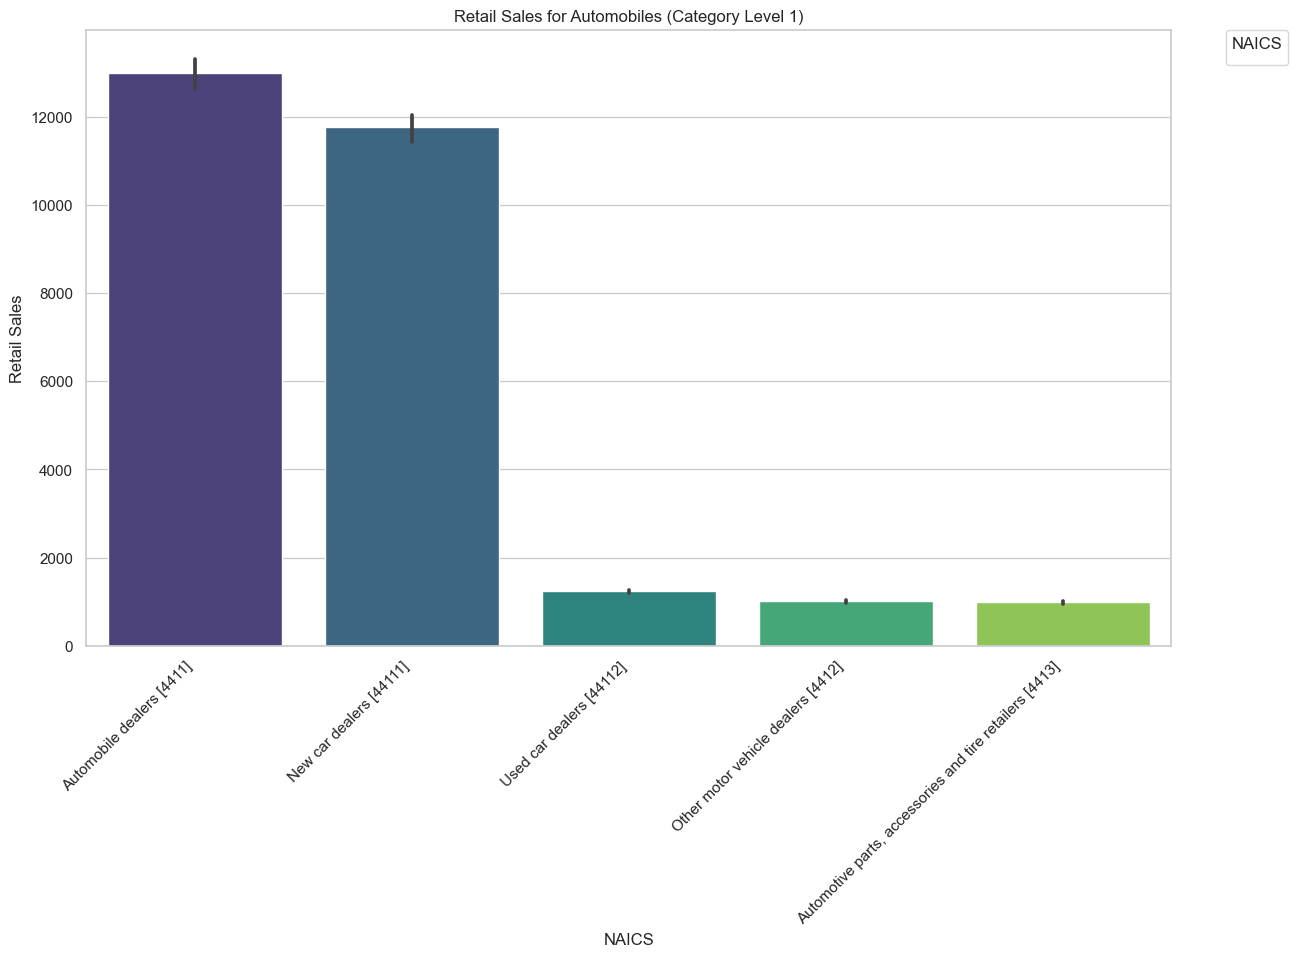

In [45]:
# Sort the DataFrame by retail sales in descending order
automobiles_df = automobiles_df.sort_values(by='VALUE', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=automobiles_df, x='NAICS', y='VALUE', palette='viridis')
plt.title('Retail Sales for Automobiles (Category Level 1)')
plt.xlabel('NAICS')
plt.ylabel('Retail Sales')

# Show legend
ax.legend(title='NAICS', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

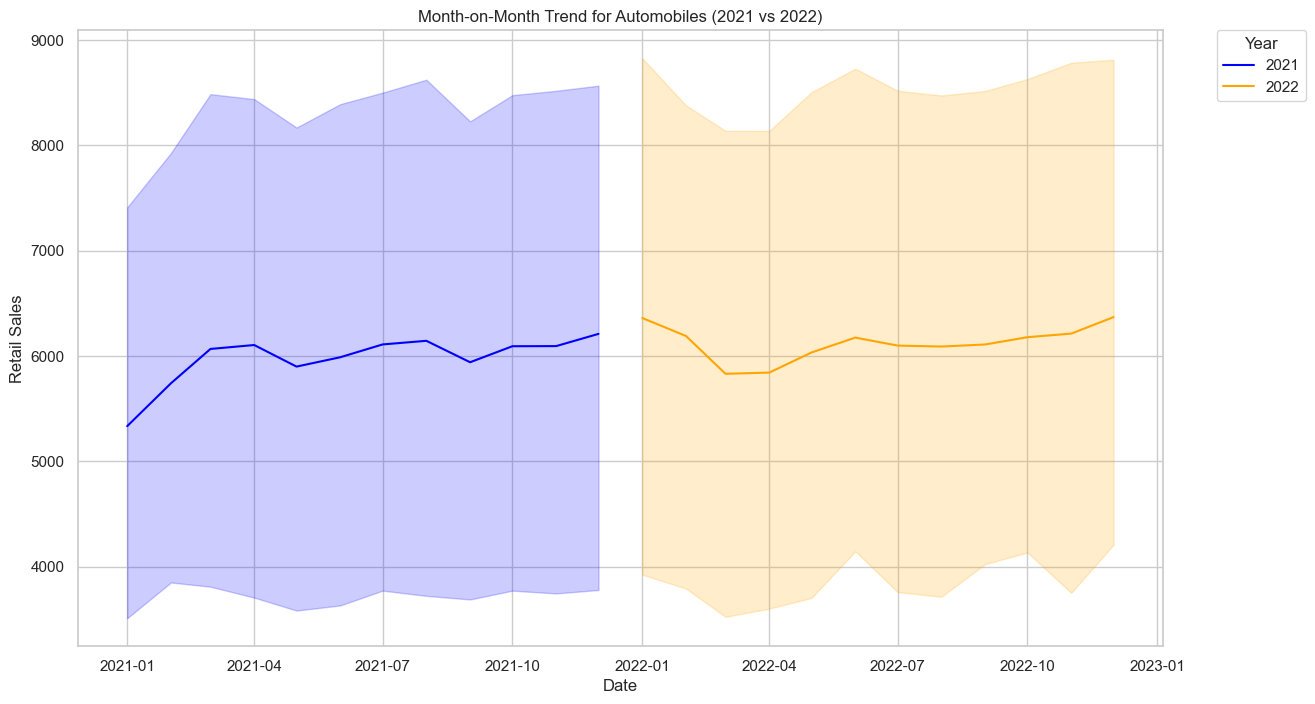

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named automobiles_df
# Convert 'REF_DATE' to datetime type
automobiles_df['REF_DATE'] = pd.to_datetime(automobiles_df['REF_DATE'], errors='coerce')

# Filter the DataFrame for the years 2021 and 2022
automobiles_2021 = automobiles_df[automobiles_df['REF_DATE'].dt.year == 2021]
automobiles_2022 = automobiles_df[automobiles_df['REF_DATE'].dt.year == 2022]

# Merge the DataFrames on the month
merged_df = pd.merge(automobiles_2021, automobiles_2022, how='outer', on=automobiles_2021['REF_DATE'].dt.month, suffixes=('_2021', '_2022'))

# Create a line plot for the month-on-month trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_df, x=merged_df['REF_DATE_2021'], y='VALUE_2021', label='2021', color='blue')
sns.lineplot(data=merged_df, x=merged_df['REF_DATE_2022'], y='VALUE_2022', label='2022', color='orange')
plt.title('Month-on-Month Trend for Automobiles (2021 vs 2022)')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [50]:
# Create a new DataFrame for 'Automobiles'
food_df = df[df['NAICS'].str.contains(r'\[445\d')]

food_df.head(5)

,REF_DATE,GEO,DGUID,NAICS,"Sales, price and volume",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,Category_Level
20,2017-01,Canada,2016A000011124,Grocery and convenience retailers [4451],Retail sales in current prices,Dollars,81,millions,6,v1446870160,1.10.1,7612.0,NaN,NaN,NaN,0,2
22,2017-01,Canada,2016A000011124,Supermarkets and other grocery retailers (exce...,Retail sales in current prices,Dollars,81,millions,6,v1446870161,1.11.1,6949.0,NaN,NaN,NaN,0,3
24,2017-01,Canada,2016A000011124,Convenience retailers and vending machine oper...,Retail sales in current prices,Dollars,81,millions,6,v1446870162,1.12.1,662.0,NaN,NaN,NaN,0,3
26,2017-01,Canada,2016A000011124,Specialty food retailers [4452],Retail sales in current prices,Dollars,81,millions,6,v1446870163,1.13.1,583.0,NaN,NaN,NaN,0,2
28,2017-01,Canada,2016A000011124,"Beer, wine and liquor retailers [4453]",Retail sales in current prices,Dollars,81,millions,6,v1446870164,1.14.1,1876.0,NaN,NaN,NaN,0,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


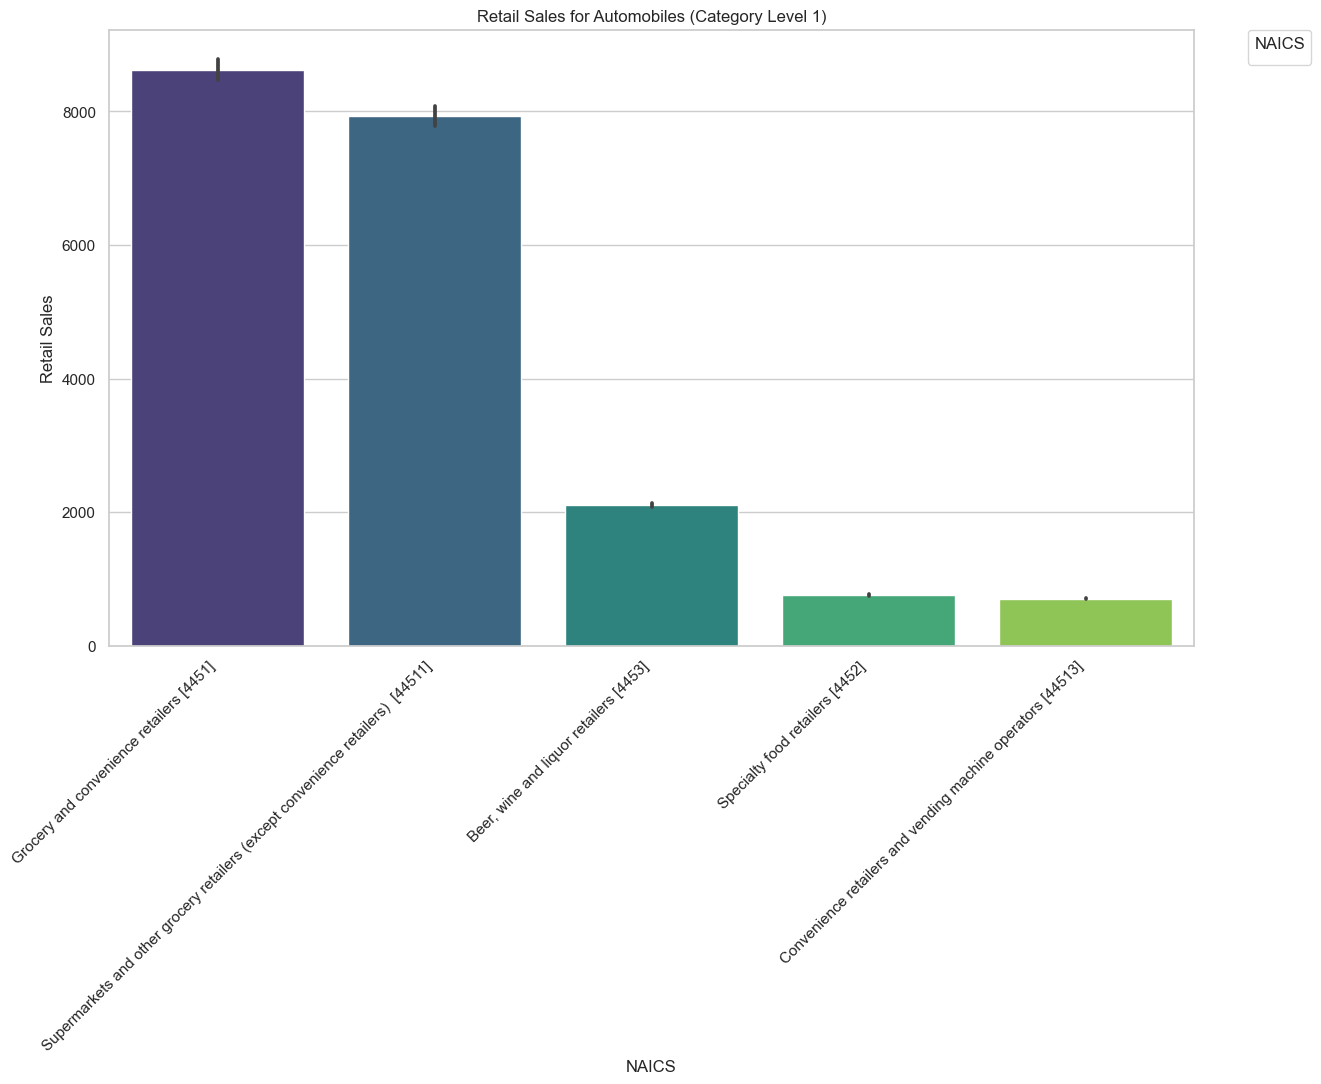

In [51]:
# Sort the DataFrame by retail sales in descending order
food_df = food_df.sort_values(by='VALUE', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=food_df, x='NAICS', y='VALUE', palette='viridis')
plt.title('Retail Sales for Automobiles (Category Level 1)')
plt.xlabel('NAICS')
plt.ylabel('Retail Sales')

# Show legend
ax.legend(title='NAICS', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()